<h1 align=center><strong>Introduction to DRL</strong></h1>

| **Chapter** | **Title**           | **Subject**                  |
| ----------- | ------------------- | ---------------------------- |
|  1  | Task                        | Intro to Task                |
|     |                             | Episodic vs. Continuous      |
|  2  | Reward Hypothesis           | Intro to Reward              |
|     |                             | Cummulative Reward           |
|     |                             | Discounted Return            |
|  3  | Markov Decision Process     | Intro to MDP                 |
|     |                             | One-Step Dynamics            |
|     |                             | Finite MDP                   |
|  4  | Policies                    | Intro to Policy              |
|     |                             | State-Value Function         |
|     |                             | Bellman Equations            |
|     |                             | Optimality                   |
|     |                             | Action-Value Function        |
|     |                             | Optimal Policies             |
|  5  | Monte Carlo Methods         | Intro to MCM                 |
|     |                             | Greedy Policies              |
|     |                             | Epsilon-Greedy Policies      |
|     |                             | Intro to MC Control          |
|     |                             | Exploration vs. Exploitation |
|     |                             | Incremental Mean             |
|     |                             | Constant-Alpha               |
|  6  | Temporal-Difference Methods | MC Control Methods           |
|     |                             | Sarsa                        |
|     |                             | Q-Learning                   |
|     |                             | Theory & Practice            |
|     |                             | Performance Analysis         |
|  7  | RL in Continuous Space      | Intro to Arpan               |
|     |                             | Discrete vs. Continuous      |
|     |                             | Discretisation               |
|     |                             | Tile Coding                  |
|     |                             | Coarse Coding                |
|     |                             | Function Approx.             |
|     |                             | Linear Function Approx.      |
|     |                             | Kernel Function              |
|     |                             | Non-Linear Function Approx.  |

In [1]:
import sys
import os

os.chdir("../utils/")
sys.path.append("drl_introduction.py")

import gymnasium as gym
import numpy as np

from collections import defaultdict

from drl_introduction import plot_blackjack_values, plot_policy

# **1. Reinforcement Learning**

![img](https://video.udacity-data.com/topher/2017/September/59c29f47_screen-shot-2017-09-20-at-12.02.06-pm/screen-shot-2017-09-20-at-12.02.06-pm.png)

The RL framework is characterized by an **agent** learning to interact with its **environment**.

At each time step, the agent receives the environment's **state** (*the environment presents a situation to the agent*), and the agent must choose an appropriate **action** in response.

One time step later, the agent receives a **reward** (*the environment indicates whether the agent has responded appropriately to the state*) and a new **state**.

All agents have the goal to maximize expected **cumulative reward**, or the expected sum of rewards attained over all time steps.

# **2. Task**

**A task is an instance of the reinforcement learning problem**.

## **2.1. Episodic Task**

Episodic tasks are tasks with a **well-defined starting and ending point**:
* **Episode** is a complete sequence of interaction, from start to finish.
* Episodic tasks come to an end whenever the agent reaches a **terminal state**.

Or formally:

$S_{0}, A_{0}, R_{0}, S_{1}, A_{1}, R_{1}, ..., S_{T}, A_{T}, R_{T}$

An example of an episodic task is a space alien game where the agent is the space ship that tries to destroy all the alien ships in every round. The round can end as "Completed" or "Game Over".

![Episodic Task](../../assets/episodic-task.jpg)

## **2.2. Continuous Task**

Continuous tasks are tasks that continue **forever, without end** or formally:

$S_{0}, A_{0}, R_{0}, S_{1}, A_{1}, R_{1}, ...$

An example is a RL agent for the stock market where it is interacting with the environment in a non-stop manner, as long as the stock market exist!

![Continuous Task in RL](../../assets/continuous-task.jpg)

# **3. Reward Hypothesis**

![Reward Hypothesis](../../assets/reward-hypothesis.jpg)

> Reward hypothesis is that *all goals can be framed as the maximisation of expected cumulative reward*.

The terms **Reinforcement** and **Reinforcement Learning** are borrowed from the field of **Behavioural Science**. The terms refer to a *stimulus delivered instantly after behaviour to make the behaviour more likely to occur in the future*.

You can imagine an experiment where a mouse is released into a maze to find a cheese that is served at the exit. If the mouse reaches the exit, it gets the cheese instantly so in the next round, it learns how to follow its instinct better to get to the cheese even faster.

## **3.1. Cummulative Reward**

The RL agent goal is to maximise the cumulative reward which comes from summing up the total amount of return at each time step. Formally also defined as

$G_{\mathcal{t}}=\mathcal{R}_{\mathcal{t}+1}+\mathcal{R}_{\mathcal{t}+2}, \mathcal{R}_{\mathcal{t}+3}, ...$

![Cumulative Reward](../../assets/cumulative-reward.jpg)

## **3.2. Discounted Return**

The idea of a discounted return is motivated by the fact the reward from the **current time step** is more valuable than one from the **next time step** because it is never a guarantee that the agent will get the reward in the next time step!

Hence the reward for the future will be multiplied by a discount rate or formally defined as

$$
G_{\mathcal{t}}=\mathcal{R}_{\mathcal{t}+1}+(\gamma)\mathcal{R}_{\mathcal{t}+2}, (\gamma^{2})\mathcal{R}_{\mathcal{t}+3}, ..., (\gamma^{m})\mathcal{R}_{\mathcal{t}+n}
\text{ where } \gamma \in [0,1]
$$

# **4. Markov Decision Process**

## **4.1. One-Step Dynamics**

## **4.2. Finite MDP**

# **5. Policies**

## **5.1. State-Value Functions**

## **5.2. Bellman Equations**

## **5.3. Optimality**

## **5.4. Action-Value Functions**

## **5.5. Optimal Policies**

# **6. Monte Carlo Methods**

**Create the environment for playing Black Jack**

In [2]:
env_bj = gym.make("Blackjack-v1", sab=True)

In [3]:
print(env_bj.observation_space)
print(env_bj.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


In [5]:
for i_episode in range(3):
    state = env_bj.reset()
    while True:
        print("State:", state)
        action = env_bj.action_space.sample()
        state, reward, done, _, info = env_bj.step(action)
        print("Reward:", reward)
        print("Done?", done)
        print("Info:", info)
        if done:
            print("End game! Reward: ", reward)
            print("You won :)\n") if reward > 0 else print("You lost :(\n")
            break

State: ((8, 4, 0), {})
Reward: 1.0
Done? True
Info: {}
End game! Reward:  1.0
You won :)

State: ((20, 3, 1), {})
Reward: 1.0
Done? True
Info: {}
End game! Reward:  1.0
You won :)

State: ((20, 7, 1), {})
Reward: 1.0
Done? True
Info: {}
End game! Reward:  1.0
You won :)



**Generating episodes based on stochastic**

In [12]:
def generate_episode_from_limit_stochastic_policy(env):
    episode = []
    state = env.reset()
    while True:
        state = state[0] if len(state) == 2 else state
        probs = [0.8, 0.2] if state[0] > 18 else [0.2, 0.8]
        action = np.random.choice(np.arange(2), p=probs)
        next_state, reward, done, _, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

In [13]:
for i in range(3):
    print(generate_episode_from_limit_stochastic_policy(env_bj))

[((17, 9, 0), np.int64(1), -1.0)]
[((14, 1, 0), np.int64(1), 0.0), ((15, 1, 0), np.int64(1), -1.0)]
[((15, 1, 0), np.int64(1), 0.0), ((21, 1, 0), np.int64(0), 1.0)]


In [ ]:
def mc_prediction_q(env, num_episodes, generate_episode, gamma=1.0):
    returns_sum = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    for i_episode in range(1, num_episodes+1):
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        episode = generate_episode(env)
        states, actions, rewards = zip(*episode)
        discounts = np.array([gamma**i for i in range(len(rewards)+1)])
        for i, state in enumerate(states):
            returns_sum[state][actions[i]] += sum(rewards[i:] * discounts[:-(1+i)])
            N[state][actions[i]] += 1.0
            Q[state][actions[i]] = returns_sum[state][actions[i]] / N[state][actions[i]]
    return Q

**Training the reinforcement learning agent to obtain the action-value function**

In [ ]:
Q = mc_prediction_q(
    env=env_bj,
    num_episodes=500000,
    generate_episode=generate_episode_from_limit_stochastic_policy
)

Episode 500000/500000.

**Obtaining and visualising the corresponding state-value functions**

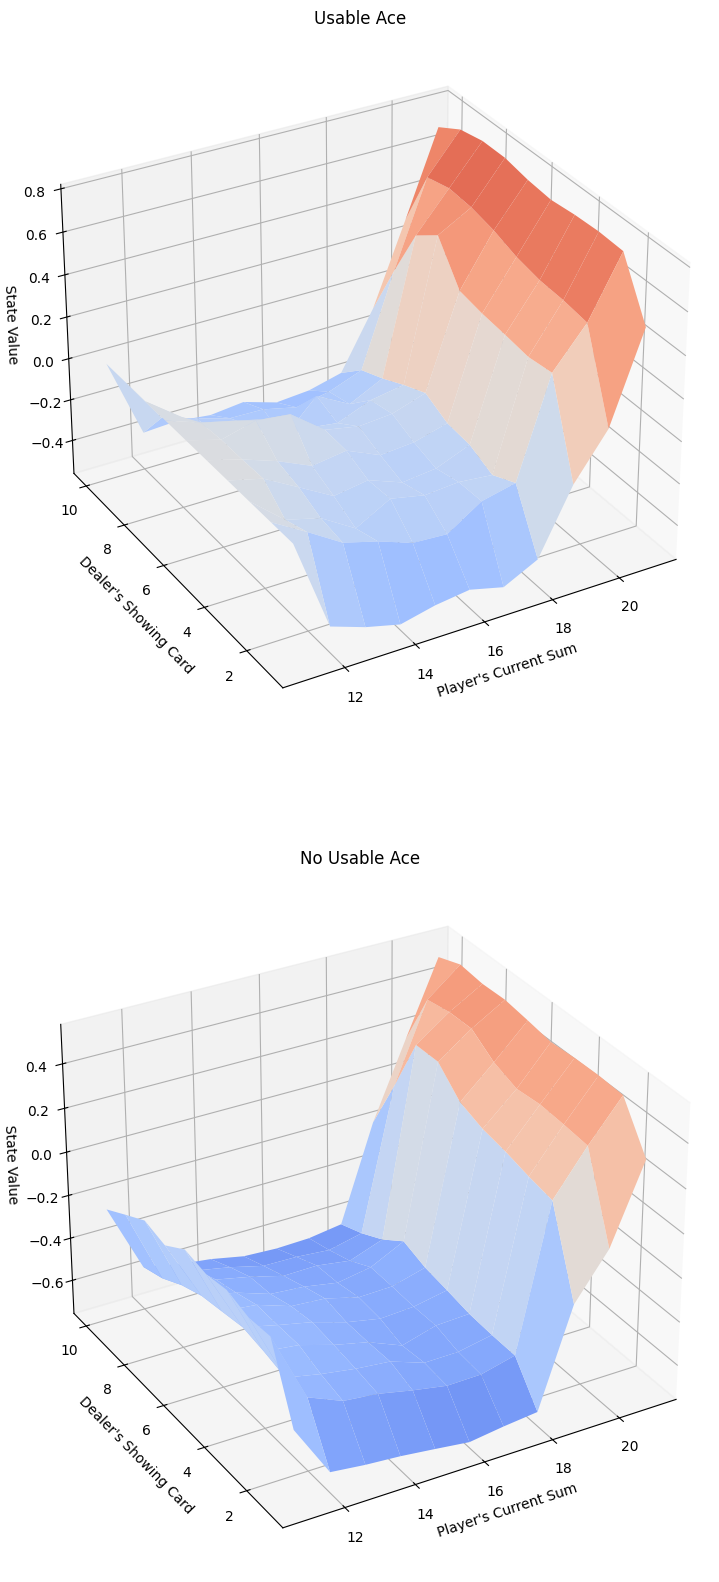

In [10]:
value_to_plot = dict(
    (
        k,(k[0]>18)*(np.dot([0.8, 0.2],v)) + (k[0]<=18)*(np.dot([0.2, 0.8],v))
    ) for k, v in Q.items()
)

plot_blackjack_values(value_to_plot)

## **6.1. Greedy Policies**

## **6.2. Epsilon-Greedy Policies**

## **6.3. Intro to MC Control**

In [14]:
def get_probabilities(Q_s, epsilon, nA):
    """Obtains the action probabilities corresponding to epsilon-greedy policy"""
    policy_s = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon / nA)
    return policy_s

In [29]:
def generate_episode_from_Q(env, Q, epsilon, nA):
    """Generates an episode from following the epsilon-greedy policy"""
    episode = []
    state = env.reset()[0] if len(env.reset()) == 2 else env.reset()
    while True:
        action = np.random.choice(
            np.arange(nA),
            p=get_probabilities(
                Q[state],
                epsilon,
                nA
            )
        ) if state in Q else env.action_space.sample()
        next_state, reward, done, _, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

In [30]:
def update_Q(env, episode, Q, alpha, gamma):
    """Updates the action-value function estimate using the most recent episode"""
    states, actions, rewards = zip(*episode)
    discounts = np.array([gamma**i for i in range(len(rewards) + 1)])
    for i, state in enumerate(states):
        old_Q = Q[state][actions[i]] 
        Q[state][actions[i]] = old_Q + alpha * (sum(rewards[i:]*discounts[:-(1+i)]) - old_Q)
    return Q

In [31]:
def mc_control(env, num_episodes, alpha, gamma=1.0, eps_start=1.0, eps_decay=.99999, eps_min=0.05):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    epsilon = eps_start
    for i_episode in range(1, num_episodes+1):
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        epsilon = max(epsilon * eps_decay, eps_min)
        episode = generate_episode_from_Q(env, Q, epsilon, nA)
        Q = update_Q(env, episode, Q, alpha, gamma)
    policy = dict((k,np.argmax(v)) for k, v in Q.items())
    return (policy, Q)

**Training the RL agent to:**

* **obtain the estimated optimal policy**, and
* **action-value function**

In [32]:
policy, Q = mc_control(env=env_bj, num_episodes=500000, alpha=0.02)

Episode 500000/500000.

**Obtaining and visualising the corresponding state-value functions**

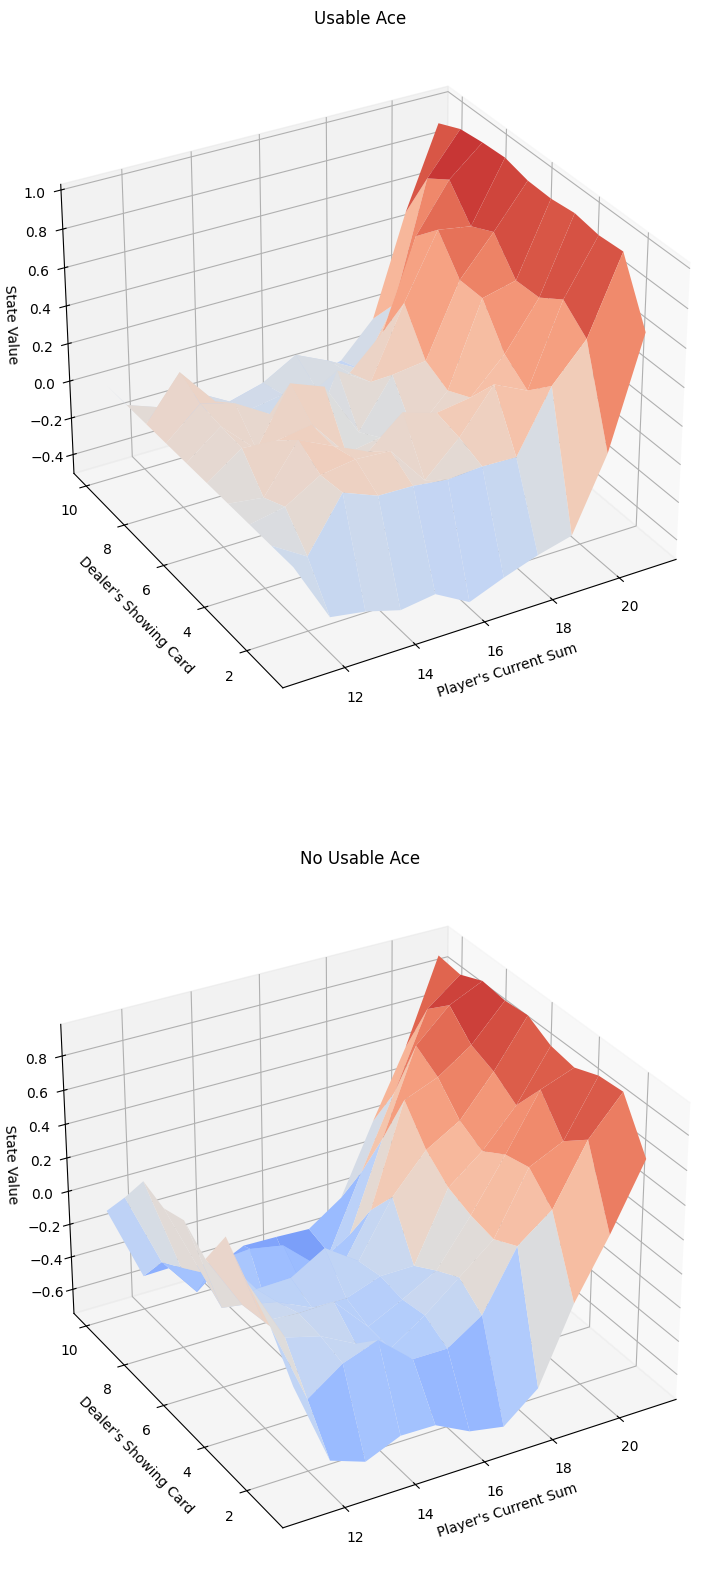

In [33]:
state_value_function = dict((k,np.max(v)) for k, v in Q.items())

plot_blackjack_values(state_value_function)

## **6.4. Exploration vs. Exploitation**

## **6.5. Incremental Mean**

## **6.6. Constant-Alpha**

# **7. Temporal-Difference Methods**

## **7.1. Sarsa**

## **7.2. Q-Learning**

## **7.3. Theory and Practice**

## **7.4. Performance Analysis**

# **8. RL in Continuous Space**

## **8.1. Intro to Arpam**

## **8.2. Discrete vs. Continuous**

## **8.3. Discretisation**

## **8.4. Tile Coding**

## **8.5. Coarse Coding**

## **8.6. Function Approximation**

## **8.7. Linear-Function Approximation**

## **8.8. Kernel Function**

## **8.9. Non-Linear Function**

# **9. What's Next?**